## 04a - Arab Spring Inclusion as Outlink
This will go trough and check when or if the Arab Spring was included in the other country links. Do the same thing but with major events - for these countries
this needs to be done a bit more carefully though because there are also one's linked in the arabic arab spring page, and we want these to be links in the english page that have the euqivalent referenced in the arabic one

The countries we will include are:
تونس, مصر, ليبيا, اليمن, سوريا, البحرين, الجزائر, العراق, الأردن, المغرب, سلطنة عُمان

The Events we will include are:
Tunisian Revolution (ILL for arabic) الثورة التونسية
, 2011 Egyptian revolution (ILL for arabic) ثورة 25 يناير
, Libyan civil war (2011) (ILL for arabic) الحرب الأهلية الليبية (2011)
, Yemeni Revolution (ILL for arabic) ثورة الشباب اليمنية
, 2011 Bahraini uprising (ILL for arabic)الاحتجاجات البحرينية 2011

Syrian revolution (the arabic page only links to the 'syrian civil war' page this one only links to 'syrian revolution'
    syrian civil war: الحرب الأهلية السورية
    syrian revolution: مرحلة الانتفاضة المدنية من الحرب الأهلية السورية

these were linked in the english one but way down at the bottom and away from everything

2010–2012 Algerian protests (ILL for arabic) الاحتجاجات الجزائرية 2011
, 2011 Iraqi protests (ILL for arabic) الاحتجاجات العراقية 2011
, 2011–2012 Jordanian protests (ILL for arabic) الاحتجاجات الأردنية 2011–2012
, 2011–2012 Moroccan protests (ILL for arabic) الاحتجاجات المغربية 2011
, 2011 Omani protests (ILL for arabic)-- but not referenced until the very bottom

import:

    no formal import but pulls on content of Data/revid_data_ar
    
output:

    04_Visuals/04b_countryInclusionofAS.pdf
    04_Visuals/04b_eventInclusionofAS.pdf
    
    
    
The Plan:
- this will go through all of their outlinks and see when they inlcuded teh AS in their outlinks. this will leverage their data that we already pulled 
- in revid_data and just go and get the oulink data
- since Libya, Iraq, and Oman are never linked ass and outlink in the arab spring article previous code woudl not have pulled that data so i do here
- find the revid_id where Arab Spring is linked
- match that with the time. 


1. Get and Organize Country Data
2. Get Libya, Iraq and Oman Data
3. Visualize Country Data
4. Get and Organize Event Data
5. Visualize Event Data

In [4]:
import numpy as np
import pandas as pd

import json, requests

import networkx as nx
import os
import pickle

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import datetime as dt
from datetime import datetime
from datetime import date, timedelta
import dateutil.relativedelta

## 1. Get and Organize Country Data

In [5]:
countrylyst = ['تونس', 'مصر', 'اليمن', 'سوريا', 'البحرين', 'الجزائر',   'الأردن', 'المغرب']

#, 'ليبيا' -- doesn't include the arab spring ever
# the arab spring never directly links the country of iraq(العراق) or Oman( 
# 'العراق',
# 'سلطنة عُمان',

In [6]:
countryTimes = {}
firstTimes = {}

for place in countrylyst:
    #get revid of outlinks with that time
#     print(place)
    path = '../Data/revid_data_ar/' + place + '/'

    #gets the outlink specific time:revid
    with open(path +'time_revid_m.pkl', 'rb') as pickleFile:
        time_revids = pickle.load(pickleFile)

    #gets the outlink specific revid:outlinks 
    with open(path +'revid_outlink_m.pkl', 'rb') as pickleFile:
         revid_outlinks = pickle.load(pickleFile)

            
    #get all of the revids that contain 'Arab Spring' in their outlinks
    revidlyst = []
    for revid, outlinks in revid_outlinks.items():
        for link in outlinks:
            if link == 'الربيع العربي':
                revidlyst.append(revid)
                
    # make the list unique
    revidlyst_unique = set(revidlyst)
    
    inclusionTimes = []
    for i in revidlyst_unique:
        rev_time = time_revids[time_revids == i].index[0]
        inclusionTimes.append(rev_time)
        
#     print(inclusionTimes)
    inclusionTimes.sort()   

    
    firstTimes[place] = inclusionTimes[0]
    countryTimes[place] = inclusionTimes

In [6]:
# countryTimes

In [8]:
# firstTimes

## 2. Get Libya, Iraq and Oman Data

In [7]:
missinglyst = ['ليبيا', 'العراق', 'سلطنة عُمان']

In [ ]:
# import numpy as np
# import pandas as pd

# import wikifunctions as wf

# %matplotlib inline
# import matplotlib.pyplot as plt

# import json, requests
# import os
# import pickle
# from tqdm import tqdm
# from math import isnan
# import math
# import shutil

In [ ]:
#this returns a dict time: revid

# def getRevIDs(article_name):

#     #gets all of the revision data 
#     revs_df = {}
#     revs_df = wf.get_all_page_revisions(article_name, endpoint='ar.wikipedia.org/w/api.php')

#     #group by month
#     revs_df = revs_df.groupby(pd.Grouper(key='timestamp',freq='M')).agg({'revid':'min'})['revid']
            
#     return revs_df

In [ ]:
#this returns a dict with the revid: outlinks
# def getOutlinks(revs_df):
    
#     #get oulinks for each revision id
#     outlinks = {}

#     #clean it bc there are alot of 'nan's
#     clean_revs_df = revs_df.dropna()
    
#     for _revid in clean_revs_df.values:
# #         print(_revid)
#         outlinks[_revid] = wf.get_revision_outlinks(int(_revid), endpoint='ar.wikipedia.org/w/api.php')

#     #if this error is raised, go through it outlink by outlink
#     for rev,links in outlinks.items():
# #         print(rev)
#         try:
#             outlinks[rev] = wf.resolve_redirects(links, endpoint='ar.wikipedia.org/w/api.php')
#         except ValueError:
#             print(rev)
#             linkslyst = []
#             for link in outlinks[rev]:
#                 linksLyst = wf.resolve_redirects(link, endpoint='ar.wikipedia.org/w/api.php')
#             print('handled')
#             outlinks[rev] = linkslyst
        
#     return outlinks


In [ ]:


# for outlink in tqdm(missinglyst):

#     path = '../Data/revid_data_notInar_needed/'+ str(outlink) + '/'

#     #make a folder
#     os.makedirs(path)

#     #get revids and time
#     time_revid = getRevIDs(outlink)

#     with open(path + '/time_revid_m.pkl', 'wb') as f:
#         pickle.dump(time_revid, f)

#     #get revids and outlinks
#     revid_outlink = getOutlinks(time_revid)

#     with open(path + '/revid_outlink_m.pkl', 'wb') as f:
#         pickle.dump(revid_outlink, f)


### 2a. Get the dates off all of the MISSING countries

In [8]:
missingCountryTimes = {}
missingFirstTimes = {}

for place in missinglyst:
    #get revid of outlinks with that time
#     print(place)
    path = '../Data/revid_data_notInar_needed/' + place + '/'

    #gets the outlink specific time:revid
    with open(path +'time_revid_m.pkl', 'rb') as pickleFile:
        time_revids = pickle.load(pickleFile)

    #gets the outlink specific revid:outlinks 
    with open(path +'revid_outlink_m.pkl', 'rb') as pickleFile:
         revid_outlinks = pickle.load(pickleFile)

            
    #get all of the revids that contain 'Arab Spring' in their outlinks
    revidlyst = []
    for revid, outlinks in revid_outlinks.items():
        for link in outlinks:
            if link == 'الربيع العربي':
                revidlyst.append(revid)
                
    # make the list unique
    revidlyst_unique = set(revidlyst)
    
    inclusionTimes = []
    for i in revidlyst_unique:
        rev_time = time_revids[time_revids == i].index[0]
        inclusionTimes.append(rev_time)
        
#     print(inclusionTimes)
    inclusionTimes.sort()   

    if len(inclusionTimes) > 0:
        missingFirstTimes[place] = inclusionTimes[0]
        missingCountryTimes[place] = inclusionTimes
    else:
        missingFirstTimes[place] = countryTimes['مصر'][0]
        missingCountryTimes[place] = countryTimes['مصر']

In [9]:
#this is ALL of the first days of inclusion
#these are dictionaries
firstInclusionDates = {**missingFirstTimes, **firstTimes}
firstInclusionDates

{'ليبيا': Timestamp('2011-12-31 00:00:00+0000', tz='UTC', freq='M'),
 'العراق': Timestamp('2011-12-31 00:00:00+0000', tz='UTC', freq='M'),
 'سلطنة عُمان': Timestamp('2021-08-31 00:00:00+0000', tz='UTC', freq='M'),
 'تونس': Timestamp('2013-06-30 00:00:00+0000', tz='UTC', freq='M'),
 'مصر': Timestamp('2011-12-31 00:00:00+0000', tz='UTC', freq='M'),
 'اليمن': Timestamp('2012-09-30 00:00:00+0000', tz='UTC', freq='M'),
 'سوريا': Timestamp('2011-06-30 00:00:00+0000', tz='UTC', freq='M'),
 'البحرين': Timestamp('2012-01-31 00:00:00+0000', tz='UTC', freq='M'),
 'الجزائر': Timestamp('2014-02-28 00:00:00+0000', tz='UTC', freq='M'),
 'الأردن': Timestamp('2011-09-30 00:00:00+0000', tz='UTC', freq='M'),
 'المغرب': Timestamp('2011-11-30 00:00:00+0000', tz='UTC', freq='M')}

In [10]:
#this is all of the times the AS is included in all of the events
#these are dictionaries
inclusionTimes = {**countryTimes, **missingCountryTimes}
inclusionTimes

{'تونس': [Timestamp('2013-06-30 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2014-06-30 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2014-07-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2014-08-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2014-09-30 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2014-10-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2014-11-30 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2014-12-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2015-01-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2015-02-28 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2015-03-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2015-04-30 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2015-05-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2015-06-30 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2015-07-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('2015-08-31 00:00:00+0000', tz='UTC', freq='M'),
  Timestamp('201

## 3. Visualize Country Data

In [11]:
#make a gaant chart
#try with tunisia

countryDF_final = pd.DataFrame(columns = ['country', 'start', 'end'])
countrylyst_full = countrylyst + missinglyst

for place in countrylyst_full:
    startTimes = []
    endTimes = []

    start = firstInclusionDates[place]
    startTimes.append(start)
    
    first = inclusionTimes[place][0]
    final = inclusionTimes[place][-1:]

    currTime = start
    #get start and end dates
    #go through all the dates in Tunisia
    for date in inclusionTimes[place]:

        month_from_start = pd.Timestamp(start) + pd.offsets.MonthEnd(n=1)

        #if it reaches the end add it to the endTimes
        if date in final:
            endTimes.append(date)

        if date == first:
            pass

        #if a month is skipped, end the last one with the start(or previous date)
        #start a new section with the new one
        elif date == month_from_start:
    #         print('----pass')
            pass

        #if it is one month after the 'start' - then pass
        else: 
            endTimes.append(start)
            startTimes.append(date)

    #     #if it is not then go back and put end
        start = date
        
    #make dataframe
    countryDict = pd.DataFrame(columns = ['country', 'start', 'end'])
    
    
    countryDict['start'] = startTimes
    countryDict['end'] = endTimes
    countryDict['country'] = place
#     print(countryDict)
    
    countryDF_final = countryDF_final.append(countryDict)
    

<ipython-input-11-51152dd95f71>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countryDF_final = countryDF_final.append(countryDict)
<ipython-input-11-51152dd95f71>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countryDF_final = countryDF_final.append(countryDict)
<ipython-input-11-51152dd95f71>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countryDF_final = countryDF_final.append(countryDict)
<ipython-input-11-51152dd95f71>:54: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  countryDF_final = countryDF_final.append(countryDict)
<ipython-input-11-51152dd95f71>:54: FutureWarning: The frame.append method is deprecated and will be

In [12]:
countryDF_final.reset_index(drop=True)

,country,start,end
0,تونس,2013-06-30 00:00:00+00:00,2013-06-30 00:00:00+00:00
1,تونس,2014-06-30 00:00:00+00:00,2021-07-31 00:00:00+00:00
2,تونس,2021-09-30 00:00:00+00:00,2023-11-30 00:00:00+00:00
3,مصر,2011-12-31 00:00:00+00:00,2011-12-31 00:00:00+00:00
4,اليمن,2012-09-30 00:00:00+00:00,2012-11-30 00:00:00+00:00
5,اليمن,2014-02-28 00:00:00+00:00,2014-09-30 00:00:00+00:00
6,اليمن,2014-09-30 00:00:00+00:00,2014-07-31 00:00:00+00:00
7,سوريا,2011-06-30 00:00:00+00:00,2011-06-30 00:00:00+00:00
8,سوريا,2012-03-31 00:00:00+00:00,2012-10-31 00:00:00+00:00
9,سوريا,2012-12-31 00:00:00+00:00,2012-12-31 00:00:00+00:00


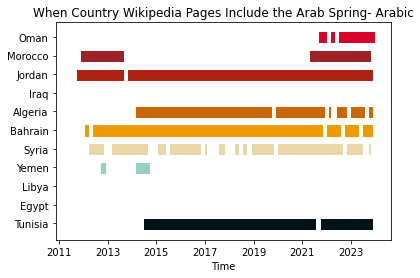

In [13]:

fig, ax = plt.subplots()
colorLyst = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226', '#d90429' ]
countrylyst_en = ['Tunisia', 'Egypt', 'Libya', 'Yemen', 'Syria', 'Bahrain', 'Algeria',  'Iraq', 'Jordan', 'Morocco', 'Oman']
             
# totlyst = countrylyst + missinglyst
totLyst = ['تونس', 'مصر', 'ليبيا', 'اليمن', 'سوريا', 'البحرين', 'الجزائر', 'العراق',  'الأردن', 'المغرب', 'سلطنة عُمان']
# print(countryDF_final['country'])
    
j = 0
ystart = 0.65
width = 0.6
for country in totLyst:
#     print(country)
    xrangeLyst = []
    
    #get the sub df
    df = countryDF_final.loc[countryDF_final['country'] == str(country)]

    for i in range(len(df)):
        x = df['start'][i]
        y = df['end'][i]- df['start'][i]
        xrangeLyst.append((x,y))

    ax.broken_barh(xranges = xrangeLyst, yrange=(ystart,width), facecolors = colorLyst[j])
    j = j +1
    ystart = ystart + 1
    
ax.set_title('When Event Wikipedia Pages Include the Arab Spring')
ax.set_xlabel('Time')
# ax.legend(labels=eventsLyst, fontsize=11, loc='center left', bbox_to_anchor=(1, 0.5))


plt.yticks([1,2,3,4,5,6,7,8, 9, 10, 11], labels= countrylyst_en)
ax.set_title('When Country Wikipedia Pages Include the Arab Spring- Arabic')

xfmt = mdates.DateFormatter('%Y')
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(xfmt)
ax.set_xticks(['2011', '2013', '2015', '2017', '2019', '2021', '2023'])
plt.savefig("04_Visuals/04b_countryInclusionofAS_ar.pdf", bbox_inches='tight')

plt.show()

# 4. Get and Organize Event Data

In [1]:
eventsLyst_translated = ['Tunisian Revolution', '2011 Egyptian revolution', 
                         'Libyan civil war (2011)',  'Yemeni Revolution', 
                         'Syrian revolution', '2011 Bahraini uprising', 
                         '2010–2012 Algerian protests', '2011 Iraqi protests', 
                         '2011–2012 Jordanian protests', '2011–2012 Moroccan protests', 
                         '2011 Omani protests' ]

In [2]:
eventsLyst = ['الثورة التونسية', 'ثورة 25 يناير',
                         'الحرب الأهلية الليبية (2011)',  'ثورة الشباب اليمنية', 
                         'الحرب الأهلية السورية', 'الاحتجاجات البحرينية 2011', 
                         'الاحتجاجات الجزائرية 2011',
              'الاحتجاجات العراقية 2011', 
                         'الاحتجاجات الأردنية 2011–2012',
              'الاحتجاجات المغربية 2011', 
                         'الاحتجاجات العمانية 2011' ]

In [14]:
eventTimes = {}
firstTimes_event = {}
noASlyst = []

for moment in eventsLyst:
    #get revid of outlinks with that time
    path = '../Data/revid_data_ar/' + moment + '/'

    #gets the outlink specific time:revid
    with open(path +'time_revid_m.pkl', 'rb') as pickleFile:
        time_revids = pickle.load(pickleFile)

    #gets the outlink specific revid:outlinks 
    with open(path +'revid_outlink_m.pkl', 'rb') as pickleFile:
         revid_outlinks = pickle.load(pickleFile)

            
    #get all of the revids that contain 'Arab Spring' in their outlinks
    revidlyst = []
    for revid, outlinks in revid_outlinks.items():
        for link in outlinks:
            if link == 'الربيع العربي':
                revidlyst.append(revid)
                
    # make the list unique
    revidlyst_unique = set(revidlyst)
    
    inclusionTimes = []
    for i in revidlyst_unique:
        rev_time = time_revids[time_revids == i].index[0]
        inclusionTimes.append(rev_time)
        
    inclusionTimes.sort()   

    if len(inclusionTimes)> 0:
        firstTimes_event[moment] = inclusionTimes[0]
    else:
        noASlyst.append(moment)
    eventTimes[moment] = inclusionTimes

In [16]:
# firstTimes_event

In [18]:
# eventTimes

## 5. Visualize the Events Page Inclusion of Arab Spring

In [ ]:
#make a gaant chart

eventDF_final = pd.DataFrame(columns = ['event', 'start', 'end'])

for place in eventTimes:
    startTimes = []
    endTimes = []

    start = firstTimes_event[place]
    startTimes.append(start)
    
    first = eventTimes[place][0]
    final = eventTimes[place][-1:]

    currTime = start
    #get start and end dates
    #go through all the dates in Tunisia
    for date in eventTimes[place]:

        month_from_start = pd.Timestamp(start) + pd.offsets.MonthEnd(n=1)

        #if it reaches the end add it to the endTimes
        if date in final:
            endTimes.append(date)

        if date == first:
            pass

        #if a month is skipped, end the last one with the start(or previous date)
        #start a new section with the new one
        elif date == month_from_start:
    #         print('----pass')
            pass

        #if it is one month after the 'start' - then pass
        else: 
            endTimes.append(start)
            startTimes.append(date)

    #     #if it is not then go back and put end
        start = date
        
    #make dataframe
    eventDict = pd.DataFrame(columns = ['event', 'start', 'end'])
    
    
    eventDict['start'] = startTimes
    eventDict['end'] = endTimes
    eventDict['event'] = place
    
    eventDF_final = pd.concat([eventDF_final, eventDict])
    

In [21]:
# eventDF_final

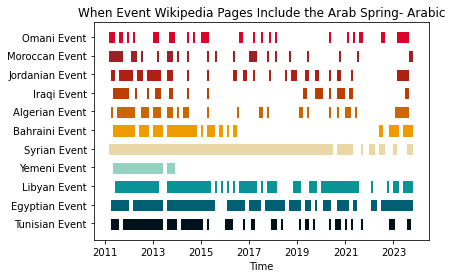

In [23]:
fig, ax = plt.subplots()
colorLyst = ['#001219', '#005f73', '#0a9396', '#94d2bd', '#e9d8a6', '#ee9b00', '#ca6702', '#bb3e03', '#ae2012', '#9b2226', '#d90429' ]
labelLyst = ['Tunisian Event', 'Egyptian Event', 'Libyan Event',  
             'Yemeni Event', 'Syrian Event', 'Bahraini Event', 
             'Algerian Event', 'Iraqi Event', 'Jordanian Event',
             'Moroccan Event', 'Omani Event' ]



j = 0
ystart = 0.65
width = 0.6

for event in eventsLyst:
#     print(country)
    xrangeLyst = []
    
    #get the sub df
    df = eventDF_final.loc[eventDF_final['event'] == str(event)]

    for i in range(len(df)):
        x = df['start'][i]
        y = df['end'][i]- df['start'][i]
        xrangeLyst.append((x,y))

    ax.broken_barh(xranges = xrangeLyst, yrange=(ystart,width), facecolors = colorLyst[j])
    j = j +1
    ystart = ystart + 1


plt.yticks([1,2,3,4,5,6,7,8,9,10,11], labelLyst)
ax.set_title('When Event Wikipedia Pages Include the Arab Spring- Arabic')

xfmt = mdates.DateFormatter('%Y')
ax.set_xlabel('Time')
ax.xaxis.set_major_formatter(xfmt)
ax.set_xticks(['2011', '2013', '2015', '2017', '2019', '2021', '2023'])
plt.savefig("04_Visuals/04b_eventInclusionofAS_ar.pdf", bbox_inches='tight')

plt.show()